# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)

In [1]:
import math
import pdb
import ast
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data 1 and data 2 were merged (inner join) 
#so that only the apps that had reviews lie in the dataset

In [4]:
# Load data from the folder where I uploaded the csv file
data_merged=pd.read_csv("/Users/AirMorena/Desktop/final_proj/csv/data_merged.csv")

FileNotFoundError: [Errno 2] File b'/Users/AirMorena/Desktop/final_proj/csv/data_merged.csv' does not exist: b'/Users/AirMorena/Desktop/final_proj/csv/data_merged.csv'

In [ ]:
print("Shape of data (samples, features): ",data_merged.shape)

In [ ]:
# Get the columns that have any missing value
s_missing_values = data_merged.isnull().sum()
s_missing_values[s_missing_values > 0]

In [ ]:
data_merged.head()

In [5]:
data_merged.info()

NameError: name 'data_merged' is not defined

In [6]:
print("Data Types: \n", data_merged.dtypes.value_counts())

NameError: name 'data_merged' is not defined

In [7]:
# unique apps in data_merged.
data_merged['App'].unique()

NameError: name 'data_merged' is not defined

In [8]:
len(data_merged['App'].unique())

NameError: name 'data_merged' is not defined

In [9]:
#Returns the column names.
data_merged.columns.tolist()

NameError: name 'data_merged' is not defined

In [10]:
data_merged.info()

NameError: name 'data_merged' is not defined

In [11]:
data_merged.isnull().sum()

NameError: name 'data_merged' is not defined

In [12]:
# we need to convert selected variables from object to float or int

In [13]:
# store a copy of merged:
data_merged1 = data_merged.copy()

NameError: name 'data_merged' is not defined

In [215]:
##############################################################################################

In [216]:
#3#############################################DATA CLEANING##################################

In [217]:
## Installs

In [218]:
# Feature Installs should be interger, need to remove the + and coma

In [219]:
data_merged['Installs'].unique()

array(['500,000+', '1,000,000+', '100,000+', '5,000,000+', '10,000+',
       '10,000,000+', '100,000,000+', '1,000,000,000+', '50,000,000+',
       '500,000,000+', '1,000+', '50,000+', '5,000+'], dtype=object)

In [220]:
# convert installs to numeric int: replace+ by '', but it leaves a coma
#data_merged['Installs'].str.replace('+','')

In [221]:
# replace comma by nothing and convert to int,and save it into data_merged['Installs'] 
data_merged['Installs']=data_merged['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [222]:
# check if it worked
data_merged['Installs'].unique()

array([    500000,    1000000,     100000,    5000000,      10000,
         10000000,  100000000, 1000000000,   50000000,  500000000,
             1000,      50000,       5000])

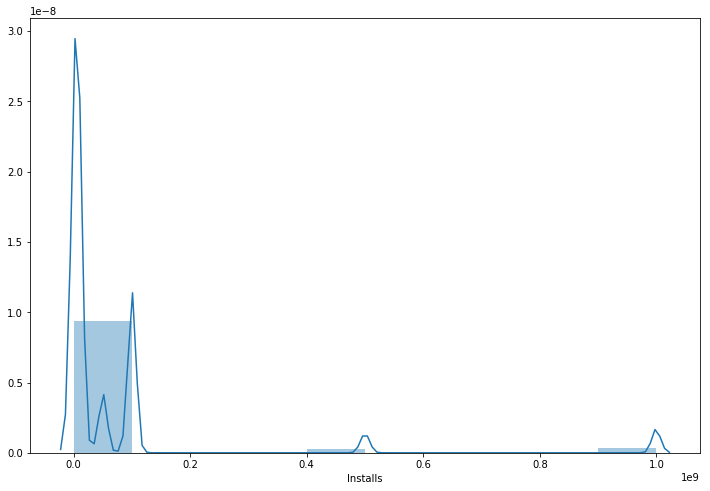

In [223]:
# Vizualise installs distribution
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Installs'], bins=10 )

Text(0.5, 1.0, 'Number of Installs by app')

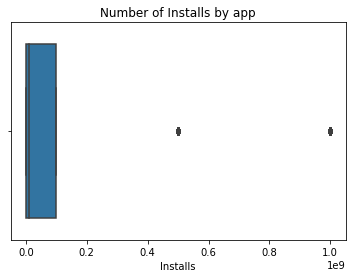

In [224]:
#vizualisation distribution of number of installs values
_=sns.boxplot(data_merged['Installs'])
plt.title("Number of Installs by app")

In [225]:
data_merged['Installs'].describe()

count    1.226620e+05
mean     7.304089e+07
std      1.896831e+08
min      1.000000e+03
25%      1.000000e+06
50%      1.000000e+07
75%      1.000000e+08
max      1.000000e+09
Name: Installs, dtype: float64

In [226]:
# we can see 2 outliers: What is an outlier?
#An outlier is a data point in a data set that is distant from all other observations. 
#A data point that lies outside the overall distribution of the dataset.

In [227]:
# First sort installs by increasing order
sorted(data_merged['Installs'])

[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,

In [228]:
# Finding first quartile and third quartile
Q1, Q3= np.percentile(data_merged['Installs'],[25,75])
print("q1: ",Q1)
print("q3: ",Q3)

q1:  1000000.0
q3:  100000000.0


In [229]:
# Find the IQR which is the difference between third and first quartile
IQR = Q3 - Q1
print("iqr: ",IQR)

iqr:  99000000.0


In [230]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)


upper_bound:  248500000.0
lower_bound:  -147500000.0


In [231]:
# remove the 2 outliers
data_merged['Installs'] = data_merged['Installs'][~((data_merged['Installs'] < (Q1 - 1.5 * IQR)) |(data_merged['Installs'] > (Q3 + 1.5 * IQR)))]

Text(0.5, 1.0, 'Number of Installs by app')

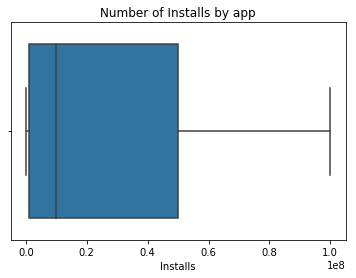

In [232]:
# boxplot of 'Installs' without outliers
_=sns.boxplot(data_merged['Installs'])
plt.title("Number of Installs by app")

In [233]:
print("Shape of data (samples, features): ",data_merged.shape)

Shape of data (samples, features):  (122662, 17)


In [234]:
data_merged['Installs'].describe()

count    1.153680e+05
mean     2.888446e+07
std      3.927389e+07
min      1.000000e+03
25%      1.000000e+06
50%      1.000000e+07
75%      5.000000e+07
max      1.000000e+08
Name: Installs, dtype: float64

In [235]:
data_merged['Installs'].unique()

array([5.e+05, 1.e+06, 1.e+05, 5.e+06, 1.e+04, 1.e+07, 1.e+08,    nan,
       5.e+07, 1.e+03, 5.e+04, 5.e+03])

In [236]:
# replace nan by mean
Installs_array = data_merged[data_merged['Installs']!=np.nan]['Installs']
data_merged['Installs']=data_merged['Installs'].replace(np.nan,Installs_array.mean())

In [237]:
data_merged['Installs'].unique()

array([5.00000000e+05, 1.00000000e+06, 1.00000000e+05, 5.00000000e+06,
       1.00000000e+04, 1.00000000e+07, 1.00000000e+08, 2.88844553e+07,
       5.00000000e+07, 1.00000000e+03, 5.00000000e+04, 5.00000000e+03])

In [238]:
## Feature Size

In [353]:
data_merged['Size'].unique()

array([1.40000000e+01, 3.30000000e+01, 3.70000000e+01, 3.90000000e+01,
       1.20000000e+01, 2.50000000e+01, 6.10000000e+00, 1.10000000e+01,
       3.46878609e+01, 1.50000000e+01, 2.40000000e+01, 1.70000000e+01,
       2.40000000e+00, 2.70000000e+01, 1.60000000e+01, 2.90000000e+00,
       3.80000000e+01, 2.10000000e+01, 5.20000000e+01, 8.20000000e+00,
       4.20000000e+00, 2.80000000e+00, 5.00000000e+00, 5.90000000e+00,
       1.90000000e+01, 7.30000000e+01, 6.80000000e+00, 4.00000000e+00,
       1.00000000e+01, 2.10000000e+00, 4.20000000e+01, 3.00000000e+01,
       2.90000000e+01, 3.90000000e+00, 1.80000000e+01, 3.20000000e+00,
       2.00000000e+01, 2.60000000e+01, 4.80000000e+01, 2.20000000e+01,
       8.50000000e+00, 2.80000000e+01, 4.60000000e+01, 2.30000000e+01,
       7.10000000e+00, 4.00000000e+01, 7.80000000e+00, 6.60000000e+00,
       5.10000000e+00, 7.90000000e-02, 3.20000000e+01, 2.20000000e+00,
       4.70000000e+00, 2.70000000e+00, 1.30000000e+01, 1.18000000e-01,
      

# to clean size we can use a for loop
## for loop to iterate over Size:

# create a new empty list:
my_new_size=[]

# create a list from series data['Size']
sizelist=data_merged['Size'].tolist()
                     
for size in sizelist:# size element in the list
       
        if size=='Varies with device':
            my_new_size.append(size)
            
        else:
            print(size)
            print(size[1:0])
            unit=size[-1]# the last character of the string is -1
            value=float(size[:-1])#change the value to float for all except last character

            if unit=='M':
                    new_value=value*1000000
                    my_new_size.append(new_value)
            elif unit=='k':
                    new_value=value/1000
                    my_new_size.append(new_value)

In [354]:
# another way: keep the values in Megabytes:Megabyte is the unit of digital information with prefix mega (106)
#https://www.gbmb.org/megabytes

In [355]:
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: float(x))
data_merged['Size'].dtypes

dtype('float64')

In [356]:
# in order to know how to replace the NaN
# we need to look at the distribution of the non nulls to decide how to deal
# with the nan, replace by zero or by the mean/median?

In [357]:
data_merged['Size'].describe()
# mean 34.68 and median 25

count    122662.000000
mean         34.687861
std          21.525494
min           0.008500
25%          19.000000
50%          34.687861
75%          35.000000
max          99.000000
Name: Size, dtype: float64

In [358]:
#select those rows that have a null value in the column Size
isnull_condition = (data_merged['Size'].isnull())

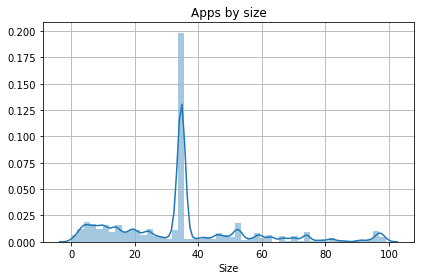

In [359]:
non_null_rating = data_merged[~isnull_condition]['Size']
#vizualisation distribution of NON NULLs of Size values
_=sns.distplot(non_null_rating)
plt.title("Apps by size")
plt.grid(True)
plt.tight_layout()

In [360]:
# replace nan by mean: create an array with the non null values and apply the mean

In [361]:
size_array = data_merged[data_merged['Size']!=np.nan]['Size']
data_merged['Size'].replace(np.nan,size_array.mean())

0         14.000000
1         14.000000
2         14.000000
3         14.000000
4         14.000000
5         14.000000
6         14.000000
7         14.000000
8         14.000000
9         14.000000
10        14.000000
11        14.000000
12        14.000000
13        14.000000
14        14.000000
15        14.000000
16        14.000000
17        14.000000
18        14.000000
19        14.000000
20        14.000000
21        14.000000
22        14.000000
23        14.000000
24        14.000000
25        14.000000
26        14.000000
27        14.000000
28        14.000000
29        14.000000
            ...    
122632    34.687861
122633    34.687861
122634    34.687861
122635    34.687861
122636    34.687861
122637    34.687861
122638    34.687861
122639    34.687861
122640    34.687861
122641    34.687861
122642    34.687861
122643    34.687861
122644    34.687861
122645    34.687861
122646    34.687861
122647    34.687861
122648    34.687861
122649    34.687861
122650    34.687861


In [362]:
data_merged['Size'].replace(np.nan,size_array.mean())

0         14.000000
1         14.000000
2         14.000000
3         14.000000
4         14.000000
5         14.000000
6         14.000000
7         14.000000
8         14.000000
9         14.000000
10        14.000000
11        14.000000
12        14.000000
13        14.000000
14        14.000000
15        14.000000
16        14.000000
17        14.000000
18        14.000000
19        14.000000
20        14.000000
21        14.000000
22        14.000000
23        14.000000
24        14.000000
25        14.000000
26        14.000000
27        14.000000
28        14.000000
29        14.000000
            ...    
122632    34.687861
122633    34.687861
122634    34.687861
122635    34.687861
122636    34.687861
122637    34.687861
122638    34.687861
122639    34.687861
122640    34.687861
122641    34.687861
122642    34.687861
122643    34.687861
122644    34.687861
122645    34.687861
122646    34.687861
122647    34.687861
122648    34.687861
122649    34.687861
122650    34.687861


In [372]:
data_merged['Size']= data_merged['Size'].replace(np.nan,size_array.mean())

In [373]:
# new size uniques (numeric, and no nans)
data_merged['Size'].unique()

array([1.40000000e+01, 3.30000000e+01, 3.70000000e+01, 3.90000000e+01,
       1.20000000e+01, 2.50000000e+01, 6.10000000e+00, 1.10000000e+01,
       3.46878609e+01, 1.50000000e+01, 2.40000000e+01, 1.70000000e+01,
       2.40000000e+00, 2.70000000e+01, 1.60000000e+01, 2.90000000e+00,
       3.80000000e+01, 2.10000000e+01, 5.20000000e+01, 8.20000000e+00,
       4.20000000e+00, 2.80000000e+00, 5.00000000e+00, 5.90000000e+00,
       1.90000000e+01, 7.30000000e+01, 6.80000000e+00, 4.00000000e+00,
       1.00000000e+01, 2.10000000e+00, 4.20000000e+01, 3.00000000e+01,
       2.90000000e+01, 3.90000000e+00, 1.80000000e+01, 3.20000000e+00,
       2.00000000e+01, 2.60000000e+01, 4.80000000e+01, 2.20000000e+01,
       8.50000000e+00, 2.80000000e+01, 4.60000000e+01, 2.30000000e+01,
       7.10000000e+00, 4.00000000e+01, 7.80000000e+00, 6.60000000e+00,
       5.10000000e+00, 7.90000000e-02, 3.20000000e+01, 2.20000000e+00,
       4.70000000e+00, 2.70000000e+00, 1.30000000e+01, 1.18000000e-01,
      

In [378]:
# new size describe without the nan (mean previously was # mean 34.68 and median 25)
data_merged['Size'].describe()
# wo the nan , the mean is 34 and median 34

count    122662.000000
mean         34.687861
std          21.525494
min           0.008500
25%          19.000000
50%          34.687861
75%          35.000000
max          99.000000
Name: Size, dtype: float64

In [379]:
data_merged['Size'].isna().sum()

0

Text(0.5, 1.0, 'Apps by size')

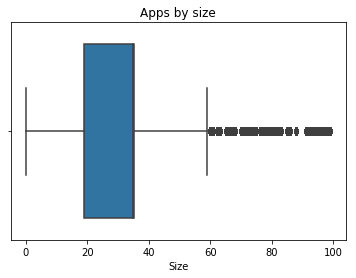

In [380]:
# outliers for installs
#vizualisation distribution of number of Size values
_=sns.boxplot(data_merged['Size'])
plt.title("Apps by size")

In [381]:
# First sort size by increasing order
#sorted(data_merged['Size'])

In [382]:
# outliers in Size
# Finding first quartile and third quartile
#Q1, Q3= np.percentile(data_merged['Size'],[25,75])
#print("q1: ",Q1)
#print("q3: ",Q3)
# Find the IQR which is the difference between third and first quartile
#IQR = Q3 - Q1
#print("iqr: ",IQR)

In [383]:
#lower_bound = Q1 -(1.5 * IQR) 
#upper_bound = Q3 +(1.5 * IQR) 
#print("upper_bound: ",upper_bound)
#print("lower_bound: ",lower_bound)

In [384]:
# remove the  outliers
#data_merged['Size'] = data_merged['Size'][~((data_merged['Size'] < (Q1 - 1.5 * IQR)) |(data_merged['Size'] > (Q3 + 1.5 * IQR)))]

In [385]:
# boxplot of 'Size' without outliers in Megabytes
#_=sns.boxplot(data_merged['Size'])
#plt.title("Size by app")
#data_merged['Size'].describe()

In [386]:
## Feature Price 

In [387]:
data_merged['Price'].unique()

array([ 0.  ,  6.99,  1.99,  4.99,  3.99,  2.99, 11.99,  9.99,  7.99,
       33.99,  3.95, 29.99,  2.49,  0.99])

In [388]:
# remove dollar from Price and store it in Price2
data_merged['Price']= data_merged['Price'].str.replace("$","")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [389]:
data_merged['Price'].unique()

array([ 0.  ,  6.99,  1.99,  4.99,  3.99,  2.99, 11.99,  9.99,  7.99,
       33.99,  3.95, 29.99,  2.49,  0.99])

In [390]:
data_merged['Price'].isna().sum()

0

In [391]:
# in order to know how to replace the NaN
# we need to look at the distribution of the non nulls to decide how to deal
# with the nan, replace by zero or by the mean/median?

In [392]:
data_merged['Price'] = data_merged['Price'].astype(float)

In [393]:
# visualise non nulls in a graph to decide 
#select those rows that have a null value in the column Size
isnull_condition = (data_merged['Price'].isna())

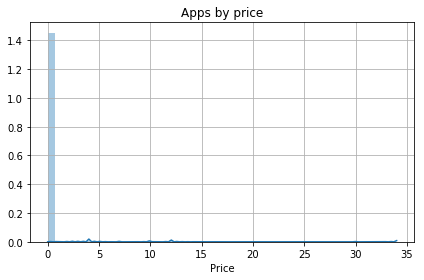

In [394]:
non_null_rating = data_merged[~isnull_condition]['Price']
#vizualisation distribution of NON NULLs of Size values
_=sns.distplot(non_null_rating)
plt.title("Apps by price")
plt.grid(True)
plt.tight_layout()

In [395]:
# most apps are free so , change nan to zero


In [396]:
# store it into Price
data_merged['Price']=data_merged['Price'].fillna(0)


In [397]:
data_merged['Price'].describe()

count    122662.000000
mean          0.128265
std           1.563680
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.990000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price by app')

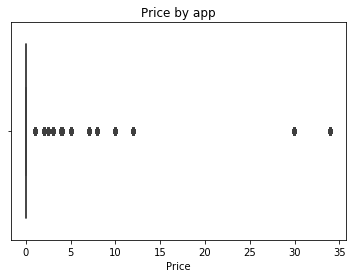

In [398]:
# boxplot of 'Size' without outliers
_=sns.boxplot(data_merged['Price'])
plt.title("Price by app")

In [399]:
data_merged['Price'].isna().sum()

0

In [400]:
data_merged['Price'].dtypes

dtype('float64')

In [401]:
data_merged['Price'].unique()

array([ 0.  ,  6.99,  1.99,  4.99,  3.99,  2.99, 11.99,  9.99,  7.99,
       33.99,  3.95, 29.99,  2.49,  0.99])

In [402]:
##  Feature reviews: means number of reviews per app

In [403]:
# Reviews
data_merged['Reviews'].unique()

array([    967,     974,   13791, ...,  179139, 1275373,  223941])

In [404]:
len(data_merged['Reviews'].unique())

1330

In [405]:
data_merged['Reviews'].dtypes

dtype('int64')

In [406]:
data_merged['Reviews'].describe()

count    1.226620e+05
mean     2.243249e+06
std      6.324819e+06
min      1.000000e+01
25%      2.752400e+04
50%      1.598720e+05
75%      1.500999e+06
max      7.815831e+07
Name: Reviews, dtype: float64

In [407]:
print("range number of reviews: ", data_merged['Reviews'].min(),"-",data_merged['Reviews'].max())

range number of reviews:  10 - 78158306


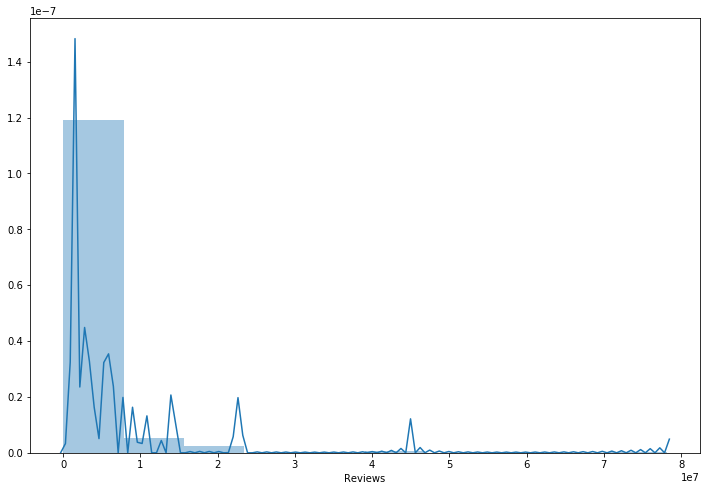

In [408]:
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviews'], bins=10 )

Text(0.5, 1.0, 'Number of reviews')

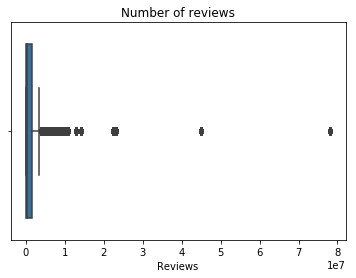

In [409]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data_merged['Reviews'])
plt.title("Number of reviews")

In [410]:
# remove outliers

In [411]:
sorted(data_merged['Reviews'])

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110

In [412]:
############## there is a problem here

In [413]:
# outliers in 'Reviews'
# Finding first quartile and third quartile
#Q1, Q3= np.percentile(data_merged['Reviews'],[25,75])
#print("q1: ",Q1)
#print("q3: ",Q3)


In [414]:
# Find the IQR which is the difference between third and first quartile
#IQR = Q3 - Q1
#print("iqr: ",IQR)
#lower_bound = Q1 -(1.5 * IQR) 
#upper_bound = Q3 +(1.5 * IQR) 
#print("upper_bound: ",upper_bound)
#print("lower_bound: ",lower_bound)

In [415]:
# remove the outliers
#data_merged['Reviews2'] = data_merged['Reviews'][~((data_merged['Reviews'] < (Q1 - 1.5 * IQR)) |(data_merged['Reviews'] > (Q3 + 1.5 * IQR)))]

In [416]:
# boxplot of ''Reviews' without outliers
#_=sns.boxplot(data_merged['Reviews2'])
#plt.title("Number of 'Reviews' by app")

In [417]:
# vizualise, once apply log to reviews

In [418]:
def transform_continuous_to_logarithmic_scale(series):
  # Transform to logarithmic scale
  return np.log(series)

In [419]:
# we add a column log reviews to the dataset

In [420]:
data_merged['Reviewslog']=transform_continuous_to_logarithmic_scale(data_merged['Reviews'])

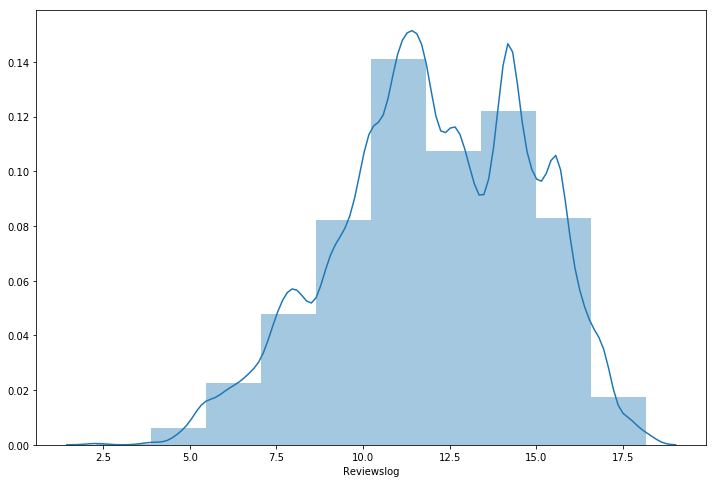

In [421]:
#visualise log reviews
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviewslog'], bins=10 )

In [422]:
## Feature Rating:

In [423]:
# Feature Rating:  has 40 missing value
#already a float , range should be within 0 to 5

In [424]:
print("range:", data_merged['Rating'].min(),"-",data_merged['Rating'].max())

range: 2.5 - 4.9


In [425]:
print(data_merged['Rating'].isna().sum(),"missing values out of", len(data_merged['Rating']))

0 missing values out of 122662


In [426]:
data_merged['Rating'].describe()

count    122662.000000
mean          4.322405
std           0.284719
min           2.500000
25%           4.200000
50%           4.400000
75%           4.500000
max           4.900000
Name: Rating, dtype: float64

In [427]:
#select those rows that have a null value in the column share
isnull_condition = (data_merged['Rating'].isnull())

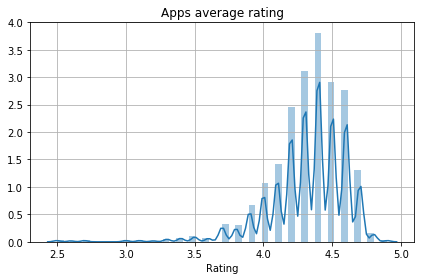

In [428]:
non_null_rating = data_merged[~isnull_condition]['Rating']
#vizualisation distribution 0 of share values
_=sns.distplot(non_null_rating)
plt.title("Apps average rating")
plt.grid(True)
plt.tight_layout()

In [429]:
rating_array = data_merged[data_merged['Rating']!=np.nan]['Rating']

In [430]:
# replace 40 nan with mean rating
data_merged['Rating'].replace(np.nan,rating_array.mean())

0         3.9
1         3.9
2         3.9
3         3.9
4         3.9
5         3.9
6         3.9
7         3.9
8         3.9
9         3.9
10        3.9
11        3.9
12        3.9
13        3.9
14        3.9
15        3.9
16        3.9
17        3.9
18        3.9
19        3.9
20        3.9
21        3.9
22        3.9
23        3.9
24        3.9
25        3.9
26        3.9
27        3.9
28        3.9
29        3.9
         ... 
122632    4.5
122633    4.5
122634    4.5
122635    4.5
122636    4.5
122637    4.5
122638    4.5
122639    4.5
122640    4.5
122641    4.5
122642    4.5
122643    4.5
122644    4.5
122645    4.5
122646    4.5
122647    4.5
122648    4.5
122649    4.5
122650    4.5
122651    4.5
122652    4.5
122653    4.5
122654    4.5
122655    4.5
122656    4.5
122657    4.5
122658    4.5
122659    4.5
122660    4.5
122661    4.5
Name: Rating, Length: 122662, dtype: float64

In [431]:
# replace nan by mean
data_merged['Rating']= data_merged['Rating'].replace(np.nan,rating_array.mean())

In [432]:
data_merged['Rating'].unique()

array([3.9       , 4.4       , 4.3       , 4.1       , 4.7       ,
       4.5       , 4.2       , 4.9       , 4.6       , 4.        ,
       4.8       , 3.4       , 3.5       , 3.8       , 3.2       ,
       3.7       , 2.6       , 3.3       , 3.        , 2.5       ,
       3.6       , 3.1       , 4.32240463, 2.7       ])

Text(0.5, 1.0, 'Apps by rating')

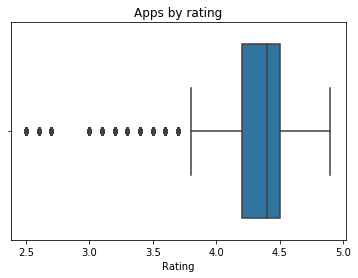

In [433]:
#vizualisation distribution of new ['Rating'] values
_=sns.boxplot(data_merged['Rating'])
plt.title("Apps by rating")

In [434]:
## Feature 'Android Ver'

In [435]:
data_merged['Android Ver'].unique()

array([4.        ,        nan, 4.1       , 4.2       , 4.09848464])

In [436]:
# replace varies with device
data_merged['Android Ver']=data_merged['Android Ver'].replace('Varies with device',np.nan)

In [437]:
data_merged['Android Ver'].str.extract('(\d\.\d)', expand=True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [438]:
#store it
data_merged['Android Ver']=data_merged['Android Ver'].str.extract('(\d\.\d)', expand=True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [439]:
data_merged['Android Ver'].unique()

array([4.        ,        nan, 4.1       , 4.2       , 4.09848464])

In [440]:
# convert to float
data_merged['Android Ver']=pd.to_numeric(data_merged['Android Ver'])

In [441]:
data_merged['Android Ver'].dtypes

dtype('float64')

In [442]:
# replace nan by mean
# create an array based on the current ver clean non nulls to look at the distribution
android_ver_clean_array = data_merged[data_merged['Android Ver']!=np.nan]['Android Ver']

In [443]:
# print (android_ver_clean_array )

Text(0.5, 1.0, 'Apps by android version')

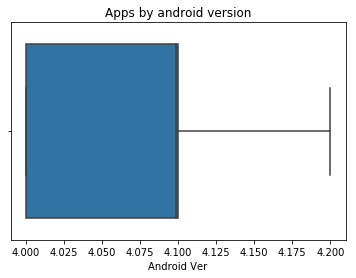

In [444]:
#vizualisation distribution of new ['Android ver'] values non nulls
_=sns.boxplot(android_ver_clean_array )
plt.title("Apps by android version")

In [445]:
# some outliers

In [446]:
# replace nan by mean
data_merged['Android Ver']=data_merged['Android Ver'].replace(np.nan,android_ver_clean_array.mean())

In [447]:
data_merged['Android Ver'].describe()

count    122662.000000
mean          4.076297
std           0.042678
min           4.000000
25%           4.076297
50%           4.098485
75%           4.098485
max           4.200000
Name: Android Ver, dtype: float64

In [448]:
data_merged['Android Ver'].unique()

array([4.        , 4.07629732, 4.1       , 4.2       , 4.09848464])

In [449]:
# remove outliers

In [450]:
# First sort size by increasing order
sorted(data_merged['Android Ver'])

[4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0

In [451]:
# outliers in Size
# Finding first quartile and third quartile
Q1, Q3= np.percentile(data_merged['Android Ver'],[25,75])
print("q1: ",Q1)
print("q3: ",Q3)
# Find the IQR which is the difference between third and first quartile
IQR = Q3 - Q1
print("iqr: ",IQR)

q1:  4.076297324248561
q3:  4.098484641948573
iqr:  0.0221873177000127


In [452]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)

upper_bound:  4.1317656184985925
lower_bound:  4.043016347698542


In [453]:
# remove the  outliers
data_merged['Android Ver'] = data_merged['Android Ver'][~((data_merged['Android Ver'] < (Q1 - 1.5 * IQR)) |(data_merged['Android Ver'] > (Q3 + 1.5 * IQR)))]

count    95339.000000
mean         4.091035
std          0.010950
min          4.076297
25%          4.076297
50%          4.098485
75%          4.100000
max          4.100000
Name: Android Ver, dtype: float64

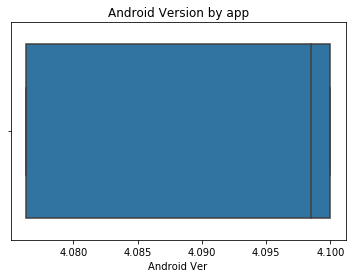

In [454]:
# boxplot of 'Size' without outliers in Megabytes
_=sns.boxplot(data_merged['Android Ver'])
plt.title("Android Version by app")
data_merged['Android Ver'].describe()

In [455]:
# Feature current ver

In [456]:
# unique values of current ver: quite dirty data, we want to get rid of the text and extract the first 2 digits
#data_merged['Current Ver'].unique()

In [457]:
# get the column and extract the first 2 digit and repetition + and return string, finadll returns a list
data_merged['Current Ver_clean'] = data_merged['Current Ver']\
                                    .apply(lambda x: re.findall('[0-9]+\.[0-9]+', 
                                                        str(x))[0] if re.findall('[0-9]+\.[0-9]+', 
                                                        str(x)) else np.nan)

In [458]:
data_merged['Current Ver_clean'].unique()

array(['2.0', '2.9', '1.2', '2.2', '1.1', '1.0', '1.03', '2.20', nan,
       '1.6', '1.7', '1.37', '1.9', '2.1', '1.911805270', '2.3', '5.0',
       '6.0', '9.00', '3.05', '2.5', '7.0', '1.15', '3.1', '3.9', '3.4',
       '2.19', '3.3', '3.550', '5.86', '99.0', '1.12', '3.19', '6.1',
       '6.4', '3.7', '2.6', '5.20', '11.1', '3.0', '2.22', '1.01', '2.8',
       '1.3', '24.6', '3.2', '5.2', '69.0', '37.1', '0.1', '7.73', '5.65',
       '5.22', '1.4', '5.85', '3.5', '8.1', '1.286', '2.17', '5.28',
       '4.17', '4.19', '1.639', '1.308', '4.5', '1.31', '1.230', '15.8',
       '4.8', '1.5', '12.0', '8.7', '5.5', '4.3', '4.4', '8.2', '4.813',
       '20.7', '1.17', '8.5', '15.9', '9.12', '4.21', '5.7', '2.4', '4.6',
       '6.18', '01.01', '11.45', '1.16', '16.0', '6.6', '8.4', '3.8',
       '20.1', '2.31', '5.10', '5.38', '2.70', '2.29', '5.1', '1.18',
       '2.10', '6.8', '4.2', '2.131', '4.10', '5.9', '7.8', '9.7', '6.7',
       '9.9', '3.52', '6.29', '2.12', '7.12', '4.0', '24.5', '

In [459]:
data_merged['Current Ver_clean'] = data_merged['Current Ver_clean'].astype(float)

In [460]:
len(data_merged['Current Ver_clean'])

122662

In [461]:
len(data_merged['Current Ver'])

122662

In [462]:
data_merged['Current Ver_clean'].describe()

count    82232.000000
mean         4.856447
std         22.914798
min          0.100000
25%          1.700000
50%          3.000000
75%          5.100000
max       1004.000000
Name: Current Ver_clean, dtype: float64

In [463]:
#  let's compare the value of current ver and current ver clean
data_merged.loc[8832]

App                           Chrome Dev
Category                   COMMUNICATION
Rating                               4.4
Reviews                            63543
Size                             34.6879
Installs                           5e+06
Type                                Free
Price                                  0
Content Rating                  Everyone
Genres                     Communication
Last Updated              August 2, 2018
Current Ver                 69.0.3497.24
Android Ver                      4.09848
Translated_Review              I another
Sentiment                        Neutral
Sentiment_Polarity                     0
Sentiment_Subjectivity                 0
Reviewslog                       11.0595
Current Ver_clean                     69
year                                2018
month                                  8
day                                    2
month_year                       2018-08
Name: 8832, dtype: object

In [464]:
# create an array based on the current ver clean non nulls to look at the distribution
current_ver_clean_array = data_merged[data_merged['Current Ver_clean']!=np.nan]['Current Ver_clean']

Text(0.5, 1.0, 'Apps by current version number')

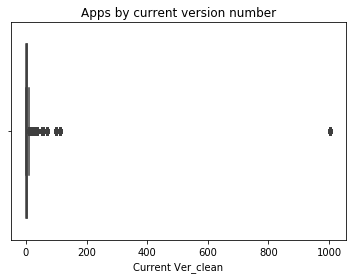

In [465]:
#vizualisation distribution of current ver clean non nulls values
_=sns.boxplot(current_ver_clean_array)
plt.title("Apps by current version number")

In [466]:
# replace nan by
data_merged['Current Ver_clean']=data_merged['Current Ver_clean'].replace(np.nan,current_ver_clean_array.mean())

In [467]:
#data_merged['Current Ver_clean'].unique()

In [468]:
## Feature Last updated

In [469]:
#data_merged['Last Updated'].unique()

In [14]:
# extract the year from string date month, day , year
#pandas datetimeindex 
data_merged['year'] = pd.DatetimeIndex(data_merged['Last Updated']).year

NameError: name 'data_merged' is not defined

In [471]:
#data.head()
#data_merged['year'].unique()

In [472]:
# extract the year from string date month, day , year
#pandas datetimeindex 
data_merged['month'] = pd.DatetimeIndex(data_merged['Last Updated']).month

In [473]:
#data_merged['month'].unique()

In [474]:
# extract the year from string date month, day , year
#pandas datetimeindex 
data_merged['day'] = pd.DatetimeIndex(data_merged['Last Updated']).day

In [475]:
#data_merged['day'].unique()

In [476]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
data_merged['month_year'] = pd.to_datetime(data_merged['Last Updated']).dt.to_period('M')

In [477]:
data_merged['month_year'].unique()

<PeriodArray>
['2018-01', '2017-09', '2018-08', '2018-03', '2017-10', '2018-07', '2018-06',
 '2018-02', '2018-05', '2017-08', '2017-03', '2015-07', '2017-11', '2016-08',
 '2018-04', '2015-09', '2016-04', '2016-06', '2014-07', '2017-01', '2017-02',
 '2016-02', '2017-12', '2016-10', '2014-08', '2015-08', '2015-06', '2015-04',
 '2013-12', '2016-09', '2016-12', '2015-01', '2017-07', '2017-06', '2016-07',
 '2015-03', '2013-03', '2012-01', '2016-03', '2011-06', '2016-11', '2014-04',
 '2017-04', '2014-12', '2013-10', '2017-05', '2015-02', '2015-10', '2016-05',
 '2014-05', '2015-12', '2016-01', '2013-09', '2015-05']
Length: 54, dtype: period[M]

In [478]:
# feature 'Translated_Review'

In [479]:
data_merged['Translated_Review'].isna().sum()

50057

In [480]:
len(data_merged['Translated_Review'].unique())

26683

In [481]:
#data_merged.loc[47298]

In [482]:
#data_merged.loc[47998] 

In [483]:
#data_merged['Translated_Review'].sort_values()

In [484]:
######## DUPLICATES

In [485]:
# get rid of duplicate rows (for all the columns except log that varies)
data_merged2=data_merged.drop_duplicates(subset=['App','Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity'])

In [486]:
# double check the row numbers
data_merged2.shape

(41661, 23)

In [487]:
##### export clean data into csv: removed duplicated, cleaned variables

In [488]:
# before saving new csv double check data types for all
data_merged2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41661 entries, 0 to 122661
Data columns (total 23 columns):
App                       41661 non-null object
Category                  41661 non-null object
Rating                    41661 non-null float64
Reviews                   41661 non-null int64
Size                      41661 non-null float64
Installs                  41661 non-null float64
Type                      41661 non-null object
Price                     41661 non-null float64
Content Rating            41661 non-null object
Genres                    41661 non-null object
Last Updated              41661 non-null object
Current Ver               41661 non-null object
Android Ver               31138 non-null float64
Translated_Review         40414 non-null object
Sentiment                 40422 non-null object
Sentiment_Polarity        40422 non-null float64
Sentiment_Subjectivity    40422 non-null float64
Reviewslog                41661 non-null float64
Current Ver_clean  

In [489]:
data_merged2.isna().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver               10523
Translated_Review          1247
Sentiment                  1239
Sentiment_Polarity         1239
Sentiment_Subjectivity     1239
Reviewslog                    0
Current Ver_clean             0
year                          0
month                         0
day                           0
month_year                    0
dtype: int64

In [490]:
# export data_clean (dealt with outliers for installs, size, android version,)
# Export data to my chosen folder
data_merged2.to_csv("/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv", index=False, encoding='utf-8')